# Deskripsi Proyek
Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, kamu bisa dengan cepat mengetahui nilai pasar mobilmu. Kamu memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Tugasmu adalah membuat suatu model yang mampu menentukan nilai pasar mobil.
Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

# Deskripsi Data

Fitur:
- DateCrawled — tanggal ketika profil diunduh dari database
- VehicleType — jenis bodi kendaraan
- RegistrationYear — tahun registrasi kendaraan
- Gearbox — jenis transmisi
- Power — daya (hp)
- Model — model kendaraan
- Mileage — jarak tempuh (diukur dalam satuan km berdasarkan dataset regional tertentu)
- RegistrationMonth — bulan registrasi kendaraan
- FuelType — jenis bahan bakar
- Brand — merek kendaraan
- NotRepaired — apakah kendaraan pernah direparasi sebelumnya
- DateCreated — tanggal pembuatan profil
- NumberOfPictures — jumlah gambar kendaraan
- PostalCode — kode pos pemilik profil (pengguna)
- LastSeen — tanggal aktivitas terakhir pengguna


Target:
- Price — harga (dalam satuan Euro)

# Persiapan Data

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler,MaxAbsScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


import time

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv('/datasets/car_data.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [128]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [129]:
df.describe(include='O')

,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,15470,8,2,250,7,40,2,109,18592
top,05/03/2016 14:25,sedan,manual,golf,petrol,volkswagen,no,03/04/2016 00:00,07/04/2016 07:16
freq,66,91457,268251,29232,216352,77013,247161,13719,654


In [130]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [131]:
df.duplicated().sum()

262

Ditemukan terdapat banyak masalah yang perlu dipertimbangkan. Masalah-masalah tersebut adalah:
- Nama kolom dalam huruf besar
- Terdapat nilai kosong dan nilai duplikasi
- Kolom-kolom berisikan tanggal dan waktu masih bertipe *object*, kolom tersebut perlu diubah menjadi tipe *datetime*


## Data Pre-processing

In [132]:
# Mengubah nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower() 
df.rename(columns={'datecrawled': 'date_crawled', 'vehicletype': "vehicle_type", 'registrationyear': "registration_year", 'registrationmonth':'registration_month',
                   'fueltype':'fuel_type', 'notrepaired':'not_repaired', 'datecreated':'date_created', 'numberofpictures':'number_of_pictures',
                   'postalcode':'postal_code', 'lastseen':'last_seen'}, inplace=True)

df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [133]:
# Menghapus data duplikasi
df.drop_duplicates(inplace = True)

In [134]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'])
df['date_created'] = pd.to_datetime(df['date_created'])
df['last_seen'] = pd.to_datetime(df['last_seen'])

## Mengisi nilai hilang

In [135]:
# Data dipisah menjadi train_dataset dan test_dataset agar tidak terjadi overfitting pada test data saat melakukan modelling 
train_dataset, test_dataset = train_test_split(df, 
                                               test_size = 0.25, 
                                               random_state = 12345)

In [136]:
print('train size', train_dataset.shape)
print('test size',test_dataset.shape)

train size (265580, 16)
test size (88527, 16)


In [137]:
train_dataset.isna().sum()

date_crawled              0
price                     0
vehicle_type          28068
registration_year         0
gearbox               14909
power                     0
model                 14683
mileage                   0
registration_month        0
fuel_type             24654
brand                     0
not_repaired          53425
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

### Vehicle_type

In [138]:
# Missing value vehicle_type pada dataset training dan test
print('Dataset training:', train_dataset['vehicle_type'].isna().sum())
print('Dataset test:', test_dataset['vehicle_type'].isna().sum())

Dataset training: 28068
Dataset test: 9416


Pada kolom **vehicle_type** dataset training memiliki 28068 nilai hilang dan dataset test memiliki 9416 dan dengan banyaknya kemungkinan nilai yang memungkinkan isinya, nilai hilang ini akan dimasukan ke dalam kategori *other*.

In [139]:
# Mengisi nilai hilang pada kolom vehicle_type dengan other
train_dataset['vehicle_type'].fillna('other', inplace = True)
test_dataset['vehicle_type'].fillna('other', inplace = True)


### Gearbox

In [140]:
# Missing value gearbox pada dataset training dan test
print('Dataset training:', train_dataset['gearbox'].isna().sum())
print('Dataset test:', test_dataset['gearbox'].isna().sum())

Dataset training: 14909
Dataset test: 4921


In [141]:
# Missing value gearbox pada dataset training dan test
print('Dataset training:', train_dataset['gearbox'].isna().sum())
print('Dataset test:', test_dataset['gearbox'].isna().sum())

Dataset training: 14909
Dataset test: 4921


Pada kolom **gearbox** dataset training memiliki 14909 nilai hilang dan dataset test memiliki 4921.Dengan sulitynya menemukan nilai yang sesuai, nilai hilaing akan diisi dengan nilai *unknown*.

In [142]:
# Menigisi nilai hilang pada kolom gearbox dengan unknown
train_dataset['gearbox'].fillna('unknown', inplace = True)
test_dataset['gearbox'].fillna('unknown', inplace = True)

### Model

In [143]:
# Missing value model pada dataset training dan test
print('Dataset training:', train_dataset['model'].isna().sum())
print('Dataset test:', test_dataset['model'].isna().sum())

Dataset training: 14683
Dataset test: 5018


Pada kolom **model** dataset training memiliki 14683 nilai hilang dan dataset test memiliki 5018. Dengan banyaknya kemungkinan untuk mengisi nilai hilang, akan lebih baik mengisi nilai hilang dengan nilai *other*.

In [144]:
# Menigisi nilai hilang pada kolom model dengan other
train_dataset['model'].fillna('other', inplace = True)
test_dataset['model'].fillna('other', inplace = True)

### Fuel_type

In [145]:
# Missing value fuel_type pada dataset training dan test
print('Dataset training:', train_dataset['fuel_type'].isna().sum())
print('Dataset test:', test_dataset['fuel_type'].isna().sum())

Dataset training: 24654
Dataset test: 8235


Pada kolom **fuel_type** dataset training memiliki 24654 nilai hilang dan dataset test memiliki 8235. Dengan banyaknya kemungkinan untuk mengisi nilai hilang, akan lebih baik mengisi nilai hilang dengan nilai *other*.

In [146]:
# Menigisi nilai hilang pada kolom fuel_type dengan other
train_dataset['fuel_type'].fillna('other', inplace = True)
test_dataset['fuel_type'].fillna('other', inplace = True)


### Not repaired

In [147]:
# Missing value fuel_type pada dataset training dan test
print('Dataset training:', train_dataset['not_repaired'].isna().sum())
print('Dataset test:', test_dataset['not_repaired'].isna().sum())

Dataset training: 53425
Dataset test: 17720


Pada kolom **not_repaired** dataset training memiliki 53425 nilai hilang dan dataset test memiliki 17720. Dengan banyaknya nilai hilang akan lebih baik mengisi nilai hilang dengan nilai *unknown*.

In [148]:
# Menigisi nilai hilang pada kolom not_repaired dengan unknown
train_dataset['not_repaired'].fillna('unknown', inplace = True)
test_dataset['not_repaired'].fillna('unknown', inplace = True)

In [149]:
train_dataset.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

In [150]:
test_dataset.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

## EDA

In [151]:
train_eda = train_dataset.copy()

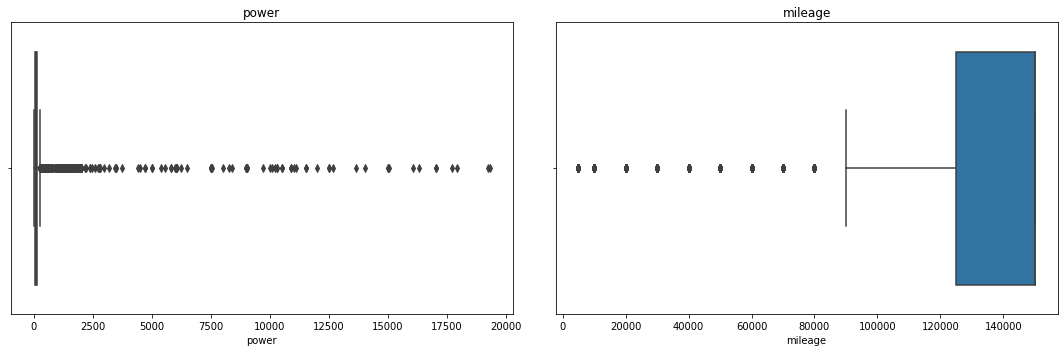

In [152]:
i = 1
plt.figure(figsize = (15,5))
re_column = ['power','mileage']
for column in re_column:
    plt.subplot(1,2,i)
    plt.tight_layout()
    sns.boxplot(train_eda[column], orient = 'h')
    plt.title(column)
    
    i +=1

Ditemukan dari violinplot pada kolom **power** secara mayoritas nilainya terpusat pada nilai disebelah kiri. Ditemukan juga terfapat nilai 0 pada kolom tersebut yang tidak mungkin terjadi. Maka, nilai 0 tersebut akan dianggap sebagai nilai hilang dan diisi kembali dengan nilai yang sesuai. Nilai outlier juga harus dibersihkan. Untuk kolom **mileage**, terdapat outlier yang perlu dibersihkan.

In [153]:
# Fungsi untuk menghapus outlier
def outlier_remover(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_whisker = Q3 + IQR * 1.5
    lower_whisker = Q1 - IQR * 1.5 

    x = df[~((df[column] < lower_whisker) | (df[column] > upper_whisker))]
    return x

In [154]:
group_means = train_eda.groupby('vehicle_type')['power'].mean()

In [155]:
train_eda.loc[train_eda['power'] == 0, 'power'].count()

30115

Terdapat 30115 data pada kolom **power** dengan nilai 0. 

In [156]:
# Mengubah nilai 0 pada kolom power menjadi 0
train_eda['power'].replace(0, np.nan, inplace=True)

In [157]:
# Mengisi nilai hilang pada kolom 0 dengan mean kolom power dari setiap vehicle_type
train_eda['power'].fillna(train_eda['vehicle_type'].map(group_means), inplace = True)

In [158]:
# Menghapus outlier dari kolom power dan mileage
train_eda = outlier_remover(df = train_eda, column = 'power')
train_eda = outlier_remover(df = train_eda, column = 'mileage')

In [159]:
print(f'Jumlah data yang dihapus dari menghapus outlier adalah: {train_dataset.shape[0] - train_eda.shape[0]}')
print(f'Jumlah data yang tersisa : {train_eda.shape[0]}')

Jumlah data yang dihapus dari menghapus outlier adalah: 45395
Jumlah data yang tersisa : 220185


Jumlah data outlier yang dihapus adalah 45395 data, menyisakan 220185 data. 

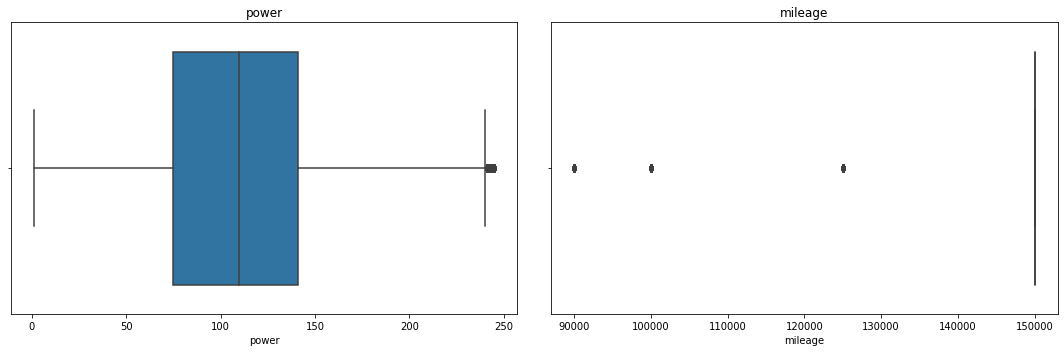

In [160]:
i = 1
plt.figure(figsize = (15,5))
re_column = ['power','mileage']
for column in re_column:
    plt.subplot(1,2,i)
    plt.tight_layout()
    sns.boxplot(train_eda[column], orient = 'h')
    plt.title(column)
    
    i +=1

In [161]:
# Mengembalikan data kembali
train_dataset = train_eda.copy()

## Pelatihan Model

In [162]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220185 entries, 126045 to 217680
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        220185 non-null  datetime64[ns]
 1   price               220185 non-null  int64         
 2   vehicle_type        220185 non-null  object        
 3   registration_year   220185 non-null  int64         
 4   gearbox             220185 non-null  object        
 5   power               220185 non-null  float64       
 6   model               220185 non-null  object        
 7   mileage             220185 non-null  int64         
 8   registration_month  220185 non-null  int64         
 9   fuel_type           220185 non-null  object        
 10  brand               220185 non-null  object        
 11  not_repaired        220185 non-null  object        
 12  date_created        220185 non-null  datetime64[ns]
 13  number_of_pictures  2201

Dalam modelling data, fitur dengan nilai yang bukan berupa angka tidak dapat dimengerti maka, fitur dengan nilai tersebut harus diubah terlebih dahulu.

In [163]:
# Function untuk melakukan label encoding
def label_encoder(df_train,columns):
    
    # Orndinal encoding untuk kolom 
    le = LabelEncoder()

    # # Fit dan transform kolom 
    a = le.fit_transform(df_train[[columns]])
    

    return a

In [164]:
train_dataset.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
126045,2016-03-27 08:58:00,2599,bus,2005,manual,109.0,c_max,150000,8,gasoline,ford,no,2016-03-27,0,90478,2016-03-27 10:47:00
67278,2016-03-21 16:59:00,1350,wagon,1997,manual,101.0,passat,150000,12,petrol,volkswagen,no,2016-03-21,0,27753,2016-02-04 17:45:00
321235,2016-07-03 22:53:00,599,wagon,1997,manual,109.0,4_reihe,150000,8,gasoline,peugeot,no,2016-07-03,0,48599,2016-03-24 19:47:00
57628,2016-04-04 18:54:00,1200,small,1993,manual,53.0,golf,150000,1,petrol,volkswagen,no,2016-04-04,0,26897,2016-06-04 21:16:00
273410,2016-03-28 14:47:00,6900,sedan,2006,manual,122.0,3er,150000,0,gasoline,bmw,no,2016-03-28,0,81243,2016-03-30 05:45:00


In [165]:
# Label encoding untuk kolom-kolom yang membutuhkannya
train_dataset['vehicle_type'] = label_encoder(train_dataset, columns = 'vehicle_type')

train_dataset['gearbox'] = label_encoder(train_dataset, columns = 'gearbox')

train_dataset['fuel_type'] = label_encoder(train_dataset, columns = 'fuel_type')

train_dataset['not_repaired'] = label_encoder(train_dataset, columns = 'not_repaired')

train_dataset['brand'] = label_encoder(train_dataset, columns = 'brand')

In [166]:
train_dataset.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
126045,2016-03-27 08:58:00,2599,0,2005,1,109.0,c_max,150000,8,2,10,0,2016-03-27,0,90478,2016-03-27 10:47:00
67278,2016-03-21 16:59:00,1350,7,1997,1,101.0,passat,150000,12,6,38,0,2016-03-21,0,27753,2016-02-04 17:45:00
321235,2016-07-03 22:53:00,599,7,1997,1,109.0,4_reihe,150000,8,2,25,0,2016-07-03,0,48599,2016-03-24 19:47:00
57628,2016-04-04 18:54:00,1200,5,1993,1,53.0,golf,150000,1,6,38,0,2016-04-04,0,26897,2016-06-04 21:16:00
273410,2016-03-28 14:47:00,6900,4,2006,1,122.0,3er,150000,0,2,2,0,2016-03-28,0,81243,2016-03-30 05:45:00


Dalam modeling ini, kolom-kolom tanggal dan waktu tidak diperlukan, maka kolom-kolom tersebut akan dihapus untuk modelling. Hal personal seperti kode postal juga tidak diperlukan beserta dengan jumlah gambar kendaraan tidak akan mempengaruhi target. Kolom model memiliki nilai unik yang terlalu banyak untuk label encoding dalam modelling, maka dari itu, fitur tesebut juga akan dihapus.

In [167]:
train_dataset =  train_dataset.drop(['date_crawled','date_created','last_seen','number_of_pictures','postal_code', 'model'], axis = 1)
train_dataset.head()

,price,vehicle_type,registration_year,gearbox,power,mileage,registration_month,fuel_type,brand,not_repaired
126045,2599,0,2005,1,109.0,150000,8,2,10,0
67278,1350,7,1997,1,101.0,150000,12,6,38,0
321235,599,7,1997,1,109.0,150000,8,2,25,0
57628,1200,5,1993,1,53.0,150000,1,6,38,0
273410,6900,4,2006,1,122.0,150000,0,2,2,0


Dengan menghapus data-data yang tidak diperlukan dan mengubah fitur-fitur dengan nilai string diubah menjadi nilai numerical, train dataset akan dipisah menjadi X_train dan y_train.

In [168]:
X_train = train_dataset.drop(['price'], axis = 1)
y_train = train_dataset['price']

In [169]:
X_train.head()

,vehicle_type,registration_year,gearbox,power,mileage,registration_month,fuel_type,brand,not_repaired
126045,0,2005,1,109.0,150000,8,2,10,0
67278,7,1997,1,101.0,150000,12,6,38,0
321235,7,1997,1,109.0,150000,8,2,25,0
57628,5,1993,1,53.0,150000,1,6,38,0
273410,4,2006,1,122.0,150000,0,2,2,0


Sebelum modelling dilakukan, ada perlunya dataset distandarisasi terlebih dahulu agar kolom dengan nilai besar tidak mempengaruhi hasil modelling.

In [170]:
# Scaling data train
s_scaler = StandardScaler()
s_scaler.fit(X_train)

X_train = pd.DataFrame(s_scaler.transform(X_train), columns = X_train.columns)
X_train.head()

,vehicle_type,registration_year,gearbox,power,mileage,registration_month,fuel_type,brand,not_repaired
0,-2.027353,0.147359,0.2652,-0.129140,0.468709,0.614244,-1.469137,-0.812310,-0.629275
1,1.372292,-0.340020,0.2652,-0.308984,0.468709,1.684295,0.748140,1.276829,-0.629275
2,1.372292,-0.340020,0.2652,-0.129140,0.468709,0.614244,-1.469137,0.306872,-0.629275
3,0.400964,-0.583710,0.2652,-1.388053,0.468709,-1.258344,0.748140,1.276829,-0.629275
4,-0.084699,0.208281,0.2652,0.163108,0.468709,-1.525856,-1.469137,-1.409207,-0.629275


In [171]:
test_dataset =  test_dataset.drop(['date_crawled','date_created','last_seen','number_of_pictures','postal_code', 'model'], axis = 1)
test_dataset.head()

,price,vehicle_type,registration_year,gearbox,power,mileage,registration_month,fuel_type,brand,not_repaired
202414,15000,other,2005,manual,250,150000,0,petrol,volkswagen,no
23621,2590,convertible,1998,manual,131,125000,6,petrol,fiat,no
302451,949,small,1998,manual,60,150000,5,petrol,volkswagen,no
211629,950,other,2017,manual,58,150000,6,petrol,renault,unknown
26802,6590,bus,2004,manual,140,150000,9,gasoline,volkswagen,no


In [172]:
# Label encoding untuk kolom-kolom yang membutuhkannya
test_dataset['vehicle_type'] = label_encoder(test_dataset, columns = 'vehicle_type')

test_dataset['gearbox'] = label_encoder(test_dataset, columns = 'gearbox')

test_dataset['fuel_type'] = label_encoder(test_dataset, columns = 'fuel_type')

test_dataset['not_repaired'] = label_encoder(test_dataset, columns = 'not_repaired')

test_dataset['brand'] = label_encoder(test_dataset, columns = 'brand')

In [173]:
X_test = test_dataset.drop('price', axis = 1)
y_test = test_dataset['price']

In [174]:
# Scaling data test
s_scaler.fit(X_test)

X_test = pd.DataFrame(s_scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,vehicle_type,registration_year,gearbox,power,mileage,registration_month,fuel_type,brand,not_repaired
0,-0.565147,0.006951,0.277079,0.645767,0.576681,-1.534925,0.706169,1.293074,-0.605393
1,-1.555611,-0.065845,0.277079,0.095277,-0.079522,0.075723,0.706169,-0.891868,-0.605393
2,0.425316,-0.065845,0.277079,-0.233167,0.576681,-0.192718,0.706169,1.293074,-0.605393
3,-0.565147,0.131745,0.277079,-0.242419,0.576681,0.075723,0.706169,0.464303,0.895744
4,-2.050843,-0.003449,0.277079,0.136910,0.576681,0.881047,-1.562566,1.293074,-0.605393


### Linear Regresssion

In [175]:
# Model regressi linear
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [176]:
# Record start time
start_time = time.process_time()

# RMSE linear regression
y_pred_lir = lir.predict(X_test)
mae_lir = round(mean_absolute_error(y_test, y_pred_lir), 2)
rmse_lir = round(math.sqrt(mean_squared_error(y_test, y_pred_lir)), 2)

print('MAE:', mae_lir, '$')
print('RMSE:', rmse_lir, '$')

# Record end time
end_time = time.process_time()

# Calculate elapsed CPU time
elapsed_time_lir = end_time - start_time
print(f"Elapsed CPU time for Linear Regression: {elapsed_time_lir} seconds")

MAE: 2567.2 $
RMSE: 4101.93 $
Elapsed CPU time for Linear Regression: 0.016161058000022877 seconds


Dari hasil prediksi, ditemukan RMSE untuk linear regression sebesar 4101.93 dollar yang menunjukan terdapat perbedaan hasil prediksi sebesar +/- 4101.93 dollar. Waktu modelling adalah 0.016 detik.

### Random Forest Regressor

In [177]:
# Record start time
start_time = time.process_time()

rf = RandomForestRegressor(n_estimators= 150,
    max_depth = 20,
    min_samples_split=10
)

rf.fit(X_train, y_train)

# Record end time
end_time = time.process_time()

# Calculate elapsed CPU time
elapsed_time_rf = end_time - start_time
print(f"Elapsed CPU time for Random Forest: {elapsed_time_rf} seconds")

Elapsed CPU time for Random Forest: 88.15140237300005 seconds


In [178]:
y_pred_rf = rf.predict(X_test)
mae_rf = round(mean_absolute_error(y_test, y_pred_rf), 2)
rmse_rf = round(math.sqrt(mean_squared_error(y_test, y_pred_rf)), 2)

print('MAE:', mae_rf, '$')
print('RMSE:', rmse_rf, '$')


MAE: 2675.4 $
RMSE: 4085.83 $


Dari hasil prediksi, ditemukan RMSE untuk random forest regression sebesar 4081.7 dollar dan waktu modelling adalah 93.82 detik.

### LightGBM

In [179]:
# Record start time
start_time = time.process_time()

lgbmr = LGBMRegressor(learning_rate= 0.03,  max_depth= 4, n_estimators= 200, num_leaves=5)

lgbmr.fit(X_train, y_train)

# Record end time
end_time = time.process_time()

# Calculate elapsed CPU time
elapsed_time_lgb = end_time - start_time
print(f"Elapsed CPU time for LGBMRegressor: {elapsed_time_lgb} seconds")

Elapsed CPU time for LGBMRegressor: 4.113292880000017 seconds


In [180]:
y_pred_lgbmr = lgbmr.predict(X_test)
mae_lgbmr = round(mean_absolute_error(y_test, y_pred_lgbmr), 2)
rmse_lgbmr = round(math.sqrt(mean_squared_error(y_test, y_pred_lgbmr)), 2)

print('MAE:', mae_lgbmr, '$')
print('RMSE:', rmse_lgbmr, '$')


MAE: 2608.55 $
RMSE: 4088.56 $


Dari hasil prediksi, ditemukan RMSE untuk LGBMregression sebesar 4088.56 dollar dan waktu modelling adalah 3.61 detik.

### CatBoost

In [181]:
# Record start time
start_time = time.process_time()

cb = CatBoostRegressor(iterations=200,  
                           depth=7, 
                           learning_rate=0.05, 
                           loss_function='RMSE'  
                           )  

cb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Record end time
end_time = time.process_time()

# Calculate elapsed CPU time
elapsed_time_cb = end_time - start_time

print(f"Elapsed CPU time for CatBoost: {elapsed_time_cb} seconds")

0:	learn: 3713.1511745	test: 4567.4060137	best: 4567.4060137 (0)	total: 54.7ms	remaining: 10.9s
10:	learn: 2843.6586808	test: 4517.8716570	best: 4517.8716570 (10)	total: 571ms	remaining: 9.81s
20:	learn: 2387.6519596	test: 4426.9491273	best: 4426.9491273 (20)	total: 1.09s	remaining: 9.29s
30:	learn: 2149.9730040	test: 4340.1533103	best: 4340.1533103 (30)	total: 1.61s	remaining: 8.76s
40:	learn: 2016.1775960	test: 4277.9940819	best: 4276.7508302 (39)	total: 2.1s	remaining: 8.14s
50:	learn: 1930.6126827	test: 4230.4390415	best: 4230.4390415 (50)	total: 2.6s	remaining: 7.59s
60:	learn: 1876.9742867	test: 4184.7650734	best: 4184.7650734 (60)	total: 3.1s	remaining: 7.05s
70:	learn: 1841.6690300	test: 4164.3292345	best: 4164.3292345 (70)	total: 3.56s	remaining: 6.46s
80:	learn: 1817.4194257	test: 4140.9731281	best: 4140.3485965 (79)	total: 4.01s	remaining: 5.9s
90:	learn: 1797.7995006	test: 4124.9385267	best: 4124.9385267 (90)	total: 4.49s	remaining: 5.38s
100:	learn: 1780.4421622	test: 4114

In [182]:
y_pred_cb = cb.predict(X_test)
mae_cb = round(mean_absolute_error(y_test, y_pred_cb), 2)
rmse_cb = round(math.sqrt(mean_squared_error(y_test, y_pred_cb)), 2)

print('MAE:', mae_cb, '$')
print('RMSE:', rmse_cb, '$')


MAE: 2602.7 $
RMSE: 4045.67 $


Dari hasil prediksi, ditemukan RMSE untuk CatBoost sebesar 4045.67 dollar dan waktu modelling adalah 9.96 detik.

### XGBoost

In [183]:
# Record start time
start_time = time.process_time()

xgb = XGBRegressor(n_estimators=175,
                   learning_rate=0.02,
                   booster = 'gblinear',
                  eta = 0.01)
xgb.fit(X_train, y_train) 

# Record end time
end_time = time.process_time()

# Calculate elapsed CPU time
elapsed_time_xgb = end_time - start_time
print(f"Elapsed CPU time for XGBoost: {elapsed_time_xgb} seconds")

Elapsed CPU time for XGBoost: 6.010856002000082 seconds


In [184]:
y_pred_xgb = xgb.predict(X_test)
mae_xgb = round(mean_absolute_error(y_test, y_pred_xgb), 2)
rmse_xgb = round(math.sqrt(mean_squared_error(y_test, y_pred_xgb)), 2)

print('MAE:', mae_xgb, '$')
print('RMSE:', rmse_xgb, '$')


MAE: 2559.28 $
RMSE: 4069.14 $


Dari hasil prediksi, ditemukan RMSE untuk XGBoost sebesar 4069.14 dollar dan waktu modelling adalah 6.21 detik.

### Kesimpulan Umum

In [185]:
pd.DataFrame({'Model':['Linear Regression','Random Forest','LGBMRegressor','CatBoost','XGBoost'],
                'RMSE':[rmse_lir, rmse_rf, rmse_lgbmr, rmse_cb, rmse_xgb], 
                'MAE':[mae_lir, mae_rf, mae_lgbmr, mae_cb, mae_xgb],
              'Modeling Time':[elapsed_time_lir,elapsed_time_rf,elapsed_time_lgb,elapsed_time_cb,elapsed_time_xgb]
             })

,Model,RMSE,MAE,Modeling Time
0,Linear Regression,4101.93,2567.20,0.016161
1,Random Forest,4085.83,2675.40,88.151402
2,LGBMRegressor,4088.56,2608.55,4.113293
3,CatBoost,4045.67,2602.70,9.940786
4,XGBoost,4069.14,2559.28,6.010856


Dari hasil yang didapat, ditemukan model-model dengan hyper parameter memiliki RMSE yang lebih kecil dibandingkan dengan model Linear Regression. Model dengan RMSE terkecil terdapat pada model CatBoost dengan waktu pemodelan 9.969 detik dan hyperparameter:
- iterations = 200
- depth = 7
- learning_rate = 0.05
- loss_function = 'RMSE'


# Kesimpulan

Pada awal mula, ditemukan beberapa masalah dalam dataset yakni,
- Nama kolom dalam huruf besar
- Nilai kosong dan nilai duplikasi
- Kolom-kolom berisikan tanggal dan waktu masih bertipe *object*, kolom tersebut perlu diubah menjadi tipe *datetime*

Sebelum nilai hilang diisi, kita akan membagi data menjadi train dataset dan test dataset agar tidak terjadi overfitting pada saat modelling. Dalam pengisian nilai hilang, nilai-nilai tersebut diisikan dengan nilai *unknown* atau *other* sesuai dengan yang dibutuhkan kolom-kolom dengan nilai hilang.

Melalui boxplot, ditemukan kolom **power** dan **mileage** perlu dibersihkan terlebih dahulu di mana, terdapat outlier yang perlu dihapus pada kedua kolom tersebut dan pada kolom **power** ditemukan nilai 0 yang seharusnya tidak mungkin terjadi. Nilai 0 tersebut akan diubah menjadi nilai hilang dan diisi dengan nilai mean dari data yang dikelompokkan menurut kolom **vehicle_type**.

Sebelum modelling dilakukan, beberapa fitur perlu diubah dahulu. Fitur-fitur tersebut adalah, **vehicle_type, gearbox, fuel_type, not_repaired dan brand**. Fitur-fitur lainnya yang berisikan nilai datetime tidak digunakan beserta dengan fitur-fitur personal seperti **number_of_pictures** dan **postal_code**. Fitur **model** juga tidak digunakan karena terlalu banyak nilai uniknya. Kita menggunakan label encoder dalam pengubahan nilai-nilai tersebut dan setelah dilakukan, kita melakukan scaler agar fitur dengan nilai besar tidak mempengaruhi hasil modelling.

Hasil modelling dapat dilihat dari rangkuman berikut:

In [186]:
pd.DataFrame({'Model':['Linear Regression','Random Forest','LGBMRegressor','CatBoost','XGBoost'],
                'RMSE':[rmse_lir, rmse_rf, rmse_lgbmr, rmse_cb, rmse_xgb], 
                'MAE':[mae_lir, mae_rf, mae_lgbmr, mae_cb, mae_xgb],
              'Modeling Time':[elapsed_time_lir,elapsed_time_rf,elapsed_time_lgb,elapsed_time_cb,elapsed_time_xgb]
             })

,Model,RMSE,MAE,Modeling Time
0,Linear Regression,4101.93,2567.20,0.016161
1,Random Forest,4085.83,2675.40,88.151402
2,LGBMRegressor,4088.56,2608.55,4.113293
3,CatBoost,4045.67,2602.70,9.940786
4,XGBoost,4069.14,2559.28,6.010856


Dapat dilihat, model dengan nilai RMSE terendah terdapat pada Categorical Boosting dengan nilai 4045.67 dollar dan dengan waktu modelling sebesar 9.96 detik. Model tersebut juga menggunakan hyperparameter berikut:
- iterations = 200
- depth = 7
- learning_rate = 0.05
- loss_function = 'RMSE'


# Daftar Periksa

Ketik 'x' untuk menandakannya sebagai selesai. Lalu, tekan tombol Shift+Enter

- [x]  Jupyter Notebook bisa dibuka
- [x]  Tidak ada kesalahan pada kode
- [x]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi
- [x]  Data telah diunduh dan disiapkan- [ ]  Model sudah dilatih
- [x]  Analisis terhadap kecepatan dan kualitas model telah dilakukan